# intellectual transient slicer

In [6]:
!which python

/Users/Oilcake/opt/anaconda3/envs/slicer/bin/python


In [7]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
# standard imports
import os

# third-party imports
import aubio
import matplotlib.pyplot as plt
import librosa
import librosa.display

# local imports
from housekeeping.datahandling import makedir, get_files
from audiotools.analyze import find_onsets
from audiotools.note import Note
from audiotools.slicer import Slicer
from aubio import source
import argparse

In [31]:
file = ('samples/xylophone_dry.aif')
x, sr = librosa.load(file)
onsets = find_onsets(file, threshold=3)

In [32]:
print(x.shape)
print(sr)

(407077,)
22050



looking for onsets in samples/xylophone_dry.aif



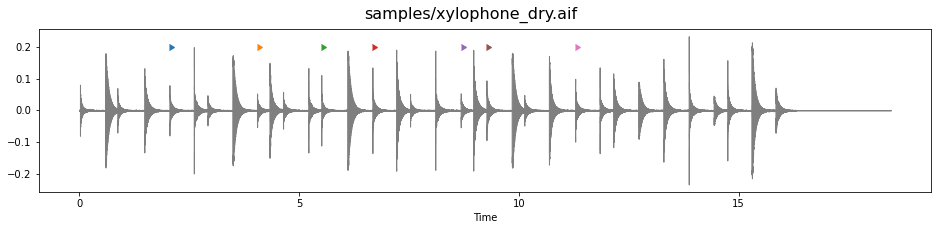

In [33]:
plt.figure(figsize=(16, 3))
plt.suptitle(str(file), fontsize=16)
for onset in onsets:
    wave_x = librosa.samples_to_time(onset, sr=sr*2)
    plt.plot(wave_x, 0.2, marker=9)

librosa.display.waveshow(x, sr=sr)
plt.show()

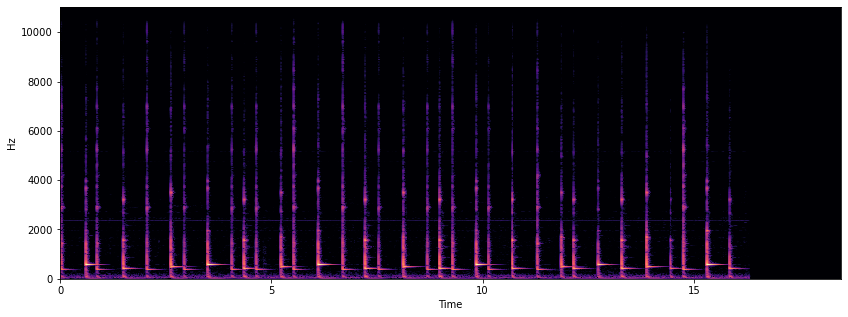

In [57]:
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.show()